In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import six
import sys
sys.modules['sklearn.externals.six'] = six
import warnings
warnings.filterwarnings(action="ignore",category=FutureWarning)

In [2]:
pd.set_option('mode.chained_assignment', None)
pd.options.display.float_format='{:,.4f}'.format

In [3]:
df=pd.read_excel("Viviendas_Madrid.xlsx",sheet_name="Datos_Históricos")
df.head(1)

,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,...,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,21742,"Piso en venta en calle de Godella, 64","San CristÃ³bal, Madrid",64.0000,60.0000,2,1.0000,NaN,NaN,NaN,...,D,False,NaN,NaN,NaN,NaN,0.0000,1.0000,0.0000,0.0000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 57 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            21742 non-null  int64  
 1   title                         21742 non-null  object 
 2   subtitle                      21742 non-null  object 
 3   sq_mt_built                   21616 non-null  float64
 4   sq_mt_useful                  8228 non-null   float64
 5   n_rooms                       21742 non-null  int64  
 6   n_bathrooms                   21726 non-null  float64
 7   n_floors                      1437 non-null   float64
 8   sq_mt_allotment               1432 non-null   float64
 9   latitude                      0 non-null      float64
 10  longitude                     0 non-null      float64
 11  raw_address                   16277 non-null  object 
 12  is_exact_address_hidden       21742 non-null  bool   
 13  s

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,"21,742.0000","10,871.5000","6,276.5191",1.0000,"5,436.2500","10,871.5000","16,306.7500","21,742.0000"
sq_mt_built,"21,616.0000",146.9209,134.1819,13.0000,70.0000,100.0000,162.0000,999.0000
sq_mt_useful,"8,228.0000",103.4582,88.2592,1.0000,59.0000,79.0000,113.0000,998.0000
n_rooms,"21,742.0000",3.0057,1.5105,0.0000,2.0000,3.0000,4.0000,24.0000
n_bathrooms,"21,726.0000",2.0917,1.4070,1.0000,1.0000,2.0000,2.0000,16.0000
n_floors,"1,437.0000",3.1287,0.9077,1.0000,2.0000,3.0000,4.0000,7.0000
sq_mt_allotment,"1,432.0000",241.6927,247.4849,1.0000,2.0000,232.0000,354.0000,997.0000
latitude,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
longitude,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
portal,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Select the features who have rows with less than 20%  of null
null_less_20_perc=pd.DataFrame((df.isnull().sum()/df.shape[0])*100<20)
lista_less_20_perc=null_less_20_perc[null_less_20_perc[0]==True].index

In [7]:
len(lista_less_20_perc)

23

In [8]:
df1=df[lista_less_20_perc]
df1.head(1)

,id,title,subtitle,sq_mt_built,n_rooms,n_bathrooms,is_exact_address_hidden,floor,is_floor_under,neighborhood_id,...,buy_price,buy_price_by_area,is_buy_price_known,house_type_id,is_renewal_needed,is_new_development,has_lift,is_exterior,energy_certificate,has_parking
0,21742,"Piso en venta en calle de Godella, 64","San CristÃ³bal, Madrid",64.0000,2,1.0000,False,3,0.0000,Neighborhood 135: San CristÃ³bal (1308.89 â‚¬/...,...,85000,1328,True,HouseType 1: Pisos,False,0.0000,0.0000,1.0000,D,False


In [9]:
#Analyzing the remaining features
(df1.isnull().sum()/df1.shape[0])*100

id                         0.0000
title                      0.0000
subtitle                   0.0000
sq_mt_built                0.5795
n_rooms                    0.0000
n_bathrooms                0.0736
is_exact_address_hidden    0.0000
floor                     11.9906
is_floor_under             5.3813
neighborhood_id            0.0000
operation                  0.0000
rent_price                 0.0000
is_rent_price_known        0.0000
buy_price                  0.0000
buy_price_by_area          0.0000
is_buy_price_known         0.0000
house_type_id              1.7984
is_renewal_needed          0.0000
is_new_development         4.5626
has_lift                  10.9742
is_exterior               13.9960
energy_certificate         0.0000
has_parking                0.0000
dtype: float64

In [10]:
#There are still features with null values, the features with more than 10% of null values will be analyzed one by one, the 
#remaining will have their null values dropped due to it´s a low percentage of the data
df1[["floor","has_lift","energy_certificate","is_exterior"]]

,floor,has_lift,energy_certificate,is_exterior
0,3,0.0000,D,1.0000
1,4,1.0000,en trÃ¡mite,1.0000
2,1,1.0000,no indicado,1.0000
3,Bajo,1.0000,en trÃ¡mite,1.0000
4,4,1.0000,en trÃ¡mite,1.0000
...,...,...,...,...
21737,4,1.0000,en trÃ¡mite,1.0000
21738,3,1.0000,en trÃ¡mite,1.0000
21739,Bajo,0.0000,E,1.0000
21740,NaN,NaN,en trÃ¡mite,NaN


In [11]:
#Analyzing the "floor" feature
df1[["floor"]].head()

,floor
0,3
1,4
2,1
3,Bajo
4,4


In [12]:
df1[["floor"]].dtypes

floor    object
dtype: object

In [13]:
df1[["floor"]].nunique()

floor    19
dtype: int64

In [14]:
df1["floor"].unique()

array([3, 4, 1, 'Bajo', 2, nan, 7, 6, 'Semi-sÃ³tano', 5,
       'Entreplanta exterior', 8, 9, 'Entreplanta interior',
       'Entreplanta', 'Semi-sÃ³tano exterior', 'SÃ³tano interior',
       'Semi-sÃ³tano interior', 'SÃ³tano', 'SÃ³tano exterior'],
      dtype=object)

In [15]:
df1["floor"].value_counts()

1                        4440
2                        3546
3                        3001
4                        2323
Bajo                     2144
5                        1310
6                         913
7                         556
8                         326
Entreplanta exterior      236
9                         181
Semi-sÃ³tano exterior      55
Semi-sÃ³tano interior      36
Entreplanta interior       32
SÃ³tano interior           23
SÃ³tano                     5
SÃ³tano exterior            4
Entreplanta                 3
Semi-sÃ³tano                1
Name: floor, dtype: int64

In [16]:
#Fixing the grammatical problems of the floor column

df1.loc[(df1["floor"]=="Semi-sÃ³tano exterior"),"floor"]="Semi-Sotano exterior"
df1.loc[(df1["floor"]=="Semi-sÃ³tano interior"),"floor"]="Semi-Sotano interior"
df1.loc[(df1["floor"]=="SÃ³tano interior"),"floor"]="Sotano interior"
df1.loc[(df1["floor"]=="SÃ³tano"),"floor"]="Sotano"
df1.loc[(df1["floor"]=="SÃ³tano exterior"),"floor"]="Sotano exterior"
df1.loc[(df1["floor"]=="Semi-sÃ³tano"),"floor"]="Semi-Sotano"

In [17]:
df1["floor"].value_counts()

1                       4440
2                       3546
3                       3001
4                       2323
Bajo                    2144
5                       1310
6                        913
7                        556
8                        326
Entreplanta exterior     236
9                        181
Semi-Sotano exterior      55
Semi-Sotano interior      36
Entreplanta interior      32
Sotano interior           23
Sotano                     5
Sotano exterior            4
Entreplanta                3
Semi-Sotano                1
Name: floor, dtype: int64

In [18]:
df1["floor"].mode()[0]

1

In [19]:
#Filling the null values with the mode
df1["floor"]=df1["floor"].fillna(df1["floor"].mode()[0])

In [20]:
#Analyzing the "has lift" feature
df1[["has_lift"]].head()

,has_lift
0,0.0000
1,1.0000
2,1.0000
3,1.0000
4,1.0000


In [21]:
df1[["has_lift"]].dtypes

has_lift    float64
dtype: object

In [22]:
df1["has_lift"].nunique()

2

In [23]:
df1["has_lift"].unique()

array([ 0.,  1., nan])

In [24]:
#Filling the null values with the mean
df1["has_lift"]=df1["has_lift"].fillna(df1["has_lift"].mean())

In [25]:
#Analyzing the energy_certificate columns
df1["energy_certificate"].head()

0              D
1    en trÃ¡mite
2    no indicado
3    en trÃ¡mite
4    en trÃ¡mite
Name: energy_certificate, dtype: object

In [26]:
df1["energy_certificate"].nunique()

10

In [27]:
df1["energy_certificate"].unique()

array(['D', 'en trÃ¡mite', 'no indicado', 'F', 'E', 'inmueble exento',
       'B', 'A', 'G', 'C'], dtype=object)

In [28]:
#Fixing the grammatical problems of the energy_certificate column

df1.loc[(df1["energy_certificate"]=="en trÃ¡mite"),"energy_certificate"]="En Trámite"

In [29]:
df1["energy_certificate"].head()

0              D
1     En Trámite
2    no indicado
3     En Trámite
4     En Trámite
Name: energy_certificate, dtype: object

In [30]:
#Analyzing the is_exterior column

df1["is_exterior"].head()

0   1.0000
1   1.0000
2   1.0000
3   1.0000
4   1.0000
Name: is_exterior, dtype: float64

In [31]:
df1["is_exterior"].nunique()

2

In [32]:
df1["is_exterior"].unique()

array([ 1., nan,  0.])

In [33]:
#Filling the null values with the mean
df1["is_exterior"]=df1["is_exterior"].fillna(df1["is_exterior"].mean())

In [34]:
#Analyzing the remaining features with null values
(df1.isnull().sum()/df1.shape[0])*100

id                        0.0000
title                     0.0000
subtitle                  0.0000
sq_mt_built               0.5795
n_rooms                   0.0000
n_bathrooms               0.0736
is_exact_address_hidden   0.0000
floor                     0.0000
is_floor_under            5.3813
neighborhood_id           0.0000
operation                 0.0000
rent_price                0.0000
is_rent_price_known       0.0000
buy_price                 0.0000
buy_price_by_area         0.0000
is_buy_price_known        0.0000
house_type_id             1.7984
is_renewal_needed         0.0000
is_new_development        4.5626
has_lift                  0.0000
is_exterior               0.0000
energy_certificate        0.0000
has_parking               0.0000
dtype: float64

In [35]:
#The remaining null values will be dropped directly since the percentage of them is very low

df1=df1.dropna()

(df1.isnull().sum()/df1.shape[0])*100


id                        0.0000
title                     0.0000
subtitle                  0.0000
sq_mt_built               0.0000
n_rooms                   0.0000
n_bathrooms               0.0000
is_exact_address_hidden   0.0000
floor                     0.0000
is_floor_under            0.0000
neighborhood_id           0.0000
operation                 0.0000
rent_price                0.0000
is_rent_price_known       0.0000
buy_price                 0.0000
buy_price_by_area         0.0000
is_buy_price_known        0.0000
house_type_id             0.0000
is_renewal_needed         0.0000
is_new_development        0.0000
has_lift                  0.0000
is_exterior               0.0000
energy_certificate        0.0000
has_parking               0.0000
dtype: float64

In [36]:
#ANALYZING THE DIFFERENT TYPE OF FEATURES IN THE DATASET
categorical=df1.select_dtypes(include="object").columns

for line in categorical:
    print("The feature " + line + " contains" ,  str(len(df1[line].unique())) ," distinct values ")

The feature title contains 9813  distinct values 
The feature subtitle contains 146  distinct values 
The feature floor contains 18  distinct values 
The feature neighborhood_id contains 126  distinct values 
The feature operation contains 1  distinct values 
The feature house_type_id contains 4  distinct values 
The feature energy_certificate contains 10  distinct values 


In [37]:
#Due to the big amount of unique values that they have, the features :title,subtitle and neighborhood_id. This will allow
#that the machine learning or neural network could work with less problems

df1=df1.drop(columns=["title","subtitle","neighborhood_id"])

In [38]:
#Redefining the new categorical values
categorical=df1.select_dtypes(include="object").columns

In [39]:
#Creating new features with the help of get_dummies
new_features=pd.get_dummies(df1[categorical])

#Joining the new features with the first dataframe
df1=pd.concat([df1,new_features],axis=1)

#Dropping the categorical columns due to they were transformed in new columns
df1=df1.drop(columns=categorical)
df1.head()

,id,sq_mt_built,n_rooms,n_bathrooms,is_exact_address_hidden,is_floor_under,rent_price,is_rent_price_known,buy_price,buy_price_by_area,...,energy_certificate_A,energy_certificate_B,energy_certificate_C,energy_certificate_D,energy_certificate_E,energy_certificate_En Trámite,energy_certificate_F,energy_certificate_G,energy_certificate_inmueble exento,energy_certificate_no indicado
0,21742,64.0000,2,1.0000,False,0.0000,471.0000,False,85000,1328,...,0,0,0,1,0,0,0,0,0,0
1,21741,70.0000,3,1.0000,True,0.0000,666.0000,False,129900,1856,...,0,0,0,0,0,1,0,0,0,0
2,21740,94.0000,2,2.0000,False,0.0000,722.0000,False,144247,1535,...,0,0,0,0,0,0,0,0,0,1
3,21739,64.0000,2,1.0000,True,1.0000,583.0000,False,109900,1717,...,0,0,0,0,0,1,0,0,0,0
4,21738,108.0000,2,2.0000,True,0.0000,"1,094.0000",False,260000,2407,...,0,0,0,0,0,1,0,0,0,0


In [40]:
#Since the column id does not add value to the DataFrame it will be dropped
df1=df1.drop(columns=["id"])
df1.head(1)

,sq_mt_built,n_rooms,n_bathrooms,is_exact_address_hidden,is_floor_under,rent_price,is_rent_price_known,buy_price,buy_price_by_area,is_buy_price_known,...,energy_certificate_A,energy_certificate_B,energy_certificate_C,energy_certificate_D,energy_certificate_E,energy_certificate_En Trámite,energy_certificate_F,energy_certificate_G,energy_certificate_inmueble exento,energy_certificate_no indicado
0,64.0000,2,1.0000,False,0.0000,471.0000,False,85000,1328,True,...,0,0,0,1,0,0,0,0,0,0


In [41]:
#Analyzing the correlation between tha different features
df1.corr()["buy_price"].abs().sort_values(ascending=False)[1:len(df1.columns)-3]

rent_price                                 0.9203
sq_mt_built                                0.8317
n_bathrooms                                0.7537
buy_price_by_area                          0.5817
n_rooms                                    0.5783
house_type_id_HouseType 2: Casa o chalet   0.3811
house_type_id_HouseType 1: Pisos           0.3301
has_parking                                0.3154
has_lift                                   0.2561
is_exact_address_hidden                    0.1680
is_floor_under                             0.1498
floor_1                                    0.1372
floor_Bajo                                 0.1360
is_exterior                                0.0935
energy_certificate_G                       0.0738
house_type_id_HouseType 5: Ãticos         0.0600
energy_certificate_C                       0.0534
is_renewal_needed                          0.0521
floor_3                                    0.0500
house_type_id_HouseType 4: DÃºplex         0.0491


In [42]:
#Defining X and y
X=df1.drop(columns=["buy_price"])
y=df1[["buy_price"]]

In [43]:
#Splitting the data in train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

In [44]:
#Standardization the data

from sklearn.preprocessing import StandardScaler

scaler_x=StandardScaler()
scaler_y=StandardScaler()

scaler_x.fit(X_train)
scaler_y.fit(y_train)

X_train=pd.DataFrame(scaler_x.transform(X_train),columns=X_train.columns)
y_train=pd.DataFrame(scaler_y.transform(y_train),columns=y_train.columns)


In [46]:
#Importing the libraries
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#Ensemble
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor,VotingRegressor
from mlxtend import regressor

#Estimators for voting
estimators_voting=[("Ridge",Ridge()),("knn",KNeighborsRegressor()),("Rfr",RandomForestRegressor(n_estimators=10, random_state=1))]

#Estimators for stacking
# Prepare the list of tuples with the first-layer classifiers
regresors = [('Ridge',Ridge()),('knn',KNeighborsRegressor())]
# Instantiate the second-layer meta estimator
reg_meta = RandomForestRegressor()


#Estimators for MLxtend
# Instantiate the 1st-layer regressors
reg_dt = DecisionTreeRegressor(min_samples_leaf = 11 , min_samples_split = 33, random_state=500)
reg_lr = LinearRegression()
reg_ridge = Ridge(random_state = 500)
# Instantiate the 2nd-layer regressor
reg_meta_mlx = RandomForestRegressor()

In [57]:
#Preparing the models

models={
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "Elastic Net":ElasticNet(),
    "KNN":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "XGB Regressor":XGBRegressor(max_depth = 3, learning_rate = 0.1, n_estimators = 100, n_jobs=2, objective='reg:squarederror', random_state=500),
    "CatBoost Regressor":CatBoostRegressor(n_estimators =100,learning_rate=0.1, max_depth=3, random_state=500,verbose=0),
    "LGBM Regressor":LGBMRegressor(max_depth = 3, learning_rate = 0.1, n_estimators = 100, objective='mean_squared_error', seed=500,force_row_wise=True,verbose=-1),
    "Bagging Regressor":BaggingRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Extra Trees Regressor":ExtraTreesRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "Voting Regressor":VotingRegressor(estimators_voting),
    "Stacking Regressor":StackingRegressor(regresors,reg_meta),
    "MLXTend Regressor":regressor.StackingRegressor([reg_dt,reg_lr,reg_ridge],reg_meta_mlx)
}

#Evaluating the models in turn
results=[]
names=[]
scoring="neg_mean_squared_error"
y_t=y_train.values.reshape(-1,1)
for name, model in models.items():
  kfold=KFold(n_splits=10,shuffle=True)
  cv_results=-cross_val_score(model,X_train.values,y_t.ravel(),cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(f"{name} :{cv_results.mean():,.4f} ({cv_results.std():.4f})")


Lasso :1.0002 (0.1015)
Ridge :0.0752 (0.0059)
Elastic Net :0.5022 (0.0422)
KNN :0.1177 (0.0149)
Decision Tree :0.0036 (0.0030)
XGB Regressor :0.0031 (0.0011)
CatBoost Regressor :0.0094 (0.0021)
LGBM Regressor :0.0075 (0.0028)
Bagging Regressor :0.0018 (0.0020)
Random Forest Regressor :0.0020 (0.0017)
Extra Trees Regressor :0.0010 (0.0011)
AdaBoostRegressor :0.0844 (0.0187)
GradientBoostingRegressor :0.0030 (0.0010)
Voting Regressor :0.0280 (0.0034)
Stacking Regressor :0.0377 (0.0033)
MLXTend Regressor :0.0031 (0.0014)


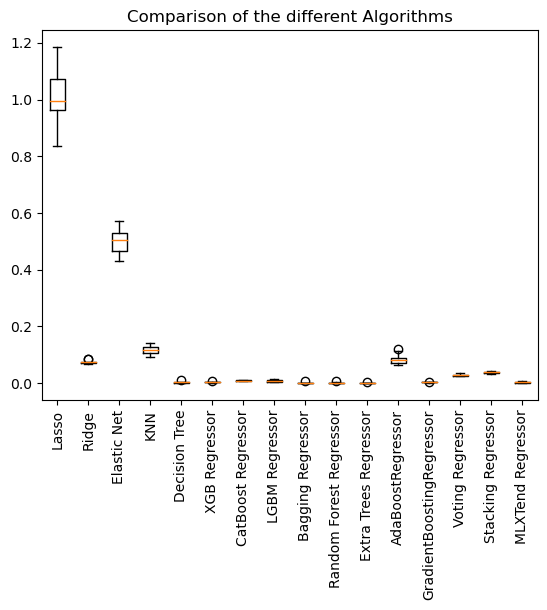

In [58]:
#Comparing the models

import matplotlib.pyplot as plt

import numpy as np

plt.title("Comparison of the different Algorithms")

plt.boxplot(results)

plt.xticks(np.arange(1,len(names)+1),names,rotation="vertical")

plt.show()

In [47]:
#Fine Tuning the best model

import numpy as np

n_estimators=np.arange(10,20)

parameters=dict(n_estimators=n_estimators)

model=ExtraTreesRegressor()

kfold=KFold(n_splits=10,shuffle=True)

grid_result=GridSearchCV(estimator=model,param_grid=parameters,cv=kfold)

y_t=y_train.values.reshape(-1,1)

grid_result.fit(X_train,y_t.ravel())

#Summarize_results
print("Best : %f using the params : %s" % (grid_result.best_score_ , grid_result.best_params_))

means=grid_result.cv_results_["mean_test_score"]
stds=grid_result.cv_results_["std_test_score"]
params=grid_result.cv_results_["params"]

for mean,stdev,param in zip(means,stds,params):
  print("%f (%f) with %r" % (mean,stdev,param))

Best : 0.998691 using the params : {'n_estimators': 16}
0.998285 (0.001458) with {'n_estimators': 10}
0.998031 (0.001694) with {'n_estimators': 11}
0.998641 (0.000983) with {'n_estimators': 12}
0.998505 (0.001281) with {'n_estimators': 13}
0.998429 (0.001509) with {'n_estimators': 14}
0.998608 (0.001358) with {'n_estimators': 15}
0.998691 (0.001239) with {'n_estimators': 16}
0.998459 (0.001726) with {'n_estimators': 17}
0.998587 (0.001439) with {'n_estimators': 18}
0.998403 (0.001704) with {'n_estimators': 19}


In [51]:
#Saving the scalers
from pickle import dump
dump(scaler_x,open("scaler_x.pkl","wb"))
dump(scaler_y,open("scaler_y.pkl","wb"))

In [52]:
#Saving the fine_tuned model
dump(grid_result,open("best_model_sklearn_madrid.pkl","wb"))

In [55]:
#Evaluating the model using different scalers

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

X_test_scaled=pd.DataFrame(scaler_x.transform(X_test),columns=X_test.columns)

y_pred=pd.DataFrame(scaler_y.inverse_transform(grid_result.predict(X_test_scaled).reshape(-1,1)),columns=y_test.columns)

mae=mean_absolute_error(y_test,y_pred)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))

r2=r2_score(y_test,y_pred)

print("MAE : %f , RMSE : %f , R2 : %f" % (mae,rmse,r2))

MAE : 5233.785832 , RMSE : 28370.468970 , R2 : 0.998467


In [63]:
y.mean()[0].round(2)

632592.35

In [64]:
#Proving the results

for i in range(0,20):
    print("Real = {} , Prediction = {} ".format(y_test.values[i][0] , round(y_pred.values[i][0])) )
    

Real = 198000 , Prediction = 196944 
Real = 380000 , Prediction = 380000 
Real = 479000 , Prediction = 479250 
Real = 165000 , Prediction = 164500 
Real = 1520000 , Prediction = 1516132 
Real = 116000 , Prediction = 115925 
Real = 730000 , Prediction = 730778 
Real = 1150000 , Prediction = 1177500 
Real = 610000 , Prediction = 610000 
Real = 334312 , Prediction = 334206 
Real = 300000 , Prediction = 300000 
Real = 2980000 , Prediction = 3007389 
Real = 160000 , Prediction = 159950 
Real = 660000 , Prediction = 690444 
Real = 995000 , Prediction = 996667 
Real = 100000 , Prediction = 99956 
Real = 860000 , Prediction = 860000 
Real = 1050000 , Prediction = 1013833 
Real = 990000 , Prediction = 985556 
Real = 109000 , Prediction = 108796 


In [64]:
#Saving the columns in a dictionary in order to use them in production

dictionary=dict(zip(X.columns,range(X.shape[1])))

dump(dictionary,open("dictionary.pkl","wb"))

In [53]:
##HYPERPARAMETER TUNING WITH HYPEROPT

from hyperopt import hp,fmin,tpe
import numpy as np

# Set up space dictionary with specified hyperparameters

space = {
    'n_estimators': hp.quniform('n_estimators', 10, 100, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.choice('max_features', ['sqrt', 'log2']),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['squared_error','absolute_error'])
}


# Set up objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']), 
        'max_depth': int(params['max_depth']),
        'max_features': str(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    xgb_clf = ExtraTreesRegressor(**params) 
    best_score = -cross_val_score(xgb_clf, X_train, y_train, scoring='neg_mean_squared_error', cv=3, n_jobs=4).mean()
    return best_score

# Run the algorithm
best = fmin(fn=objective,space=space, max_evals=20, rstate=np.random.default_rng(42), algo=tpe.suggest)
print(best)

100%|███████████████████████████████████████████████| 20/20 [07:37<00:00, 22.85s/trial, best loss: 0.07032577828538371]
{'criterion': 1, 'max_depth': 50.0, 'max_features': 0, 'min_samples_leaf': 2.0, 'min_samples_split': 9.0, 'n_estimators': 75.0}


In [56]:
#Creating the model with the results gotten from the Hyperopt and evaluating it using different scalers

modelo=ExtraTreesRegressor(criterion= "absolute_error", max_features='sqrt', max_depth=50, min_samples_leaf= 2, min_samples_split= 9, n_estimators= 75)

modelo.fit(X_train,y_train.values.ravel())

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

X_test_scaled=pd.DataFrame(scaler_x.transform(X_test),columns=X_test.columns)

y_pred=pd.DataFrame(scaler_y.inverse_transform(modelo.predict(X_test_scaled).reshape(-1,1)),columns=y_test.columns)

mae=mean_absolute_error(y_test.values.ravel(),y_pred.values.ravel())

rmse=np.sqrt(mean_squared_error(y_test.values.ravel(),y_pred.values.ravel()))

r2=r2_score(y_test.values.ravel(),y_pred.values.ravel())

print("MAE : %f , RMSE : %f , R2 : %f" % (mae,rmse,r2))


MAE : 83575.175306 , RMSE : 210156.230608 , R2 : 0.915861


In [72]:
#SOLVING THE PROBLEM WITH GENETIC ALGORITHMS
from tpot import TPOTRegressor
# Assign the values outlined to the inputs
number_generations = 4
population_size = 4
offspring_size = 4
scoring_function = 'neg_mean_squared_error'

# Create the tpot classifier
tpot_clf = TPOTRegressor(generations=number_generations, population_size=population_size,
                          offspring_size=offspring_size, scoring=scoring_function,
                          verbosity=2, random_state=2, cv=2)

# Fit the classifier to the training data
tpot_clf.fit(X_train.values , y_train.values.ravel())

print("="*30)

# Score on the test set

X_test=pd.DataFrame(scaler_x.transform(X_test),columns=X_test.columns)
y_test=pd.DataFrame(scaler_y.transform(y_test),columns=y_test.columns)

print("MSE",-tpot_clf.score(X_test.values , y_test.values.ravel()))

Optimization Progress:   0%|          | 0/20 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.005830631513412805

Generation 2 - Current best internal CV score: -0.005830631513412805

Generation 3 - Current best internal CV score: -0.005830631513412805

Generation 4 - Current best internal CV score: -0.005742598760188407

Best pipeline: DecisionTreeRegressor(input_matrix, max_depth=8, min_samples_leaf=3, min_samples_split=7)
MSE 0.01576410463938068


In [73]:
#SOLVING THE PROBLEM WITH ARTIFICIAL NEURAL NETWORKS

In [57]:
#Importing the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [58]:
early=EarlyStopping(monitor="val_loss", patience=20)

In [59]:
#Creating the model
model=Sequential()
model.add(Dense(256,input_dim=X.shape[1],activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(1,activation="linear"))

#Compiling the model
model.compile(optimizer="adam", loss="mse")

#Fitting the model
history=model.fit(X_train,y_train,epochs=200,batch_size=32,validation_split=0.25, callbacks=[early])

Epoch 1/200
317/317 [==============================] - 3s 6ms/step - loss: 0.0860 - val_loss: 0.0494
Epoch 2/200
317/317 [==============================] - 2s 5ms/step - loss: 0.0238 - val_loss: 0.0064
Epoch 3/200
317/317 [==============================] - 1s 4ms/step - loss: 0.0080 - val_loss: 0.0086
Epoch 4/200
317/317 [==============================] - 1s 4ms/step - loss: 0.0038 - val_loss: 0.0037
Epoch 5/200
317/317 [==============================] - 1s 5ms/step - loss: 0.0032 - val_loss: 0.0026
Epoch 6/200
317/317 [==============================] - 1s 5ms/step - loss: 0.0023 - val_loss: 0.0034
Epoch 7/200
317/317 [==============================] - 1s 4ms/step - loss: 0.0019 - val_loss: 0.0026
Epoch 8/200
317/317 [==============================] - 1s 4ms/step - loss: 0.0037 - val_loss: 0.0024
Epoch 9/200
317/317 [==============================] - 1s 4ms/step - loss: 0.0036 - val_loss: 0.0031
Epoch 10/200
317/317 [==============================] - 1s 5ms/step - loss: 0.0028 - val_lo

317/317 [==============================] - 2s 6ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 79/200
317/317 [==============================] - 2s 5ms/step - loss: 2.9428e-04 - val_loss: 6.6839e-04
Epoch 80/200
317/317 [==============================] - 1s 5ms/step - loss: 3.3888e-04 - val_loss: 0.0013
Epoch 81/200
317/317 [==============================] - 1s 5ms/step - loss: 2.4017e-04 - val_loss: 3.0853e-04
Epoch 82/200
317/317 [==============================] - 2s 5ms/step - loss: 2.7029e-04 - val_loss: 5.3147e-04
Epoch 83/200
317/317 [==============================] - 1s 5ms/step - loss: 3.1920e-04 - val_loss: 7.0986e-04
Epoch 84/200
317/317 [==============================] - 1s 5ms/step - loss: 0.0017 - val_loss: 4.5035e-04
Epoch 85/200
317/317 [==============================] - 1s 5ms/step - loss: 3.3504e-04 - val_loss: 3.5999e-04
Epoch 86/200
317/317 [==============================] - 2s 5ms/step - loss: 6.2299e-04 - val_loss: 4.5824e-04
Epoch 87/200
317/317 [=================

In [60]:
#Evaluating the model using the test data

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

scaler_x=StandardScaler()
scaler_y=StandardScaler()
scaler_x.fit(X_train)
scaler_y.fit(y_train)

X_train=pd.DataFrame(scaler_x.transform(X_train),columns=X_train.columns)
y_train=pd.DataFrame(scaler_y.transform(y_train),columns=y_train.columns)

X_test_scaled=pd.DataFrame(scaler_x.transform(X_test),columns=X_test.columns)
y_test_scaled=pd.DataFrame(scaler_y.transform(y_test),columns=y_test.columns)

model.evaluate(X_test_scaled,y_test_scaled,verbose=0)

0.0006134907016530633

In [61]:
#Evaluating the MAE,RMSE and R2 of the neural network

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

y_pred=pd.DataFrame(scaler_y.inverse_transform(model.predict(X_test_scaled,verbose=0).reshape(-1,1)),columns=y_test.columns)

mae=mean_absolute_error(y_test,y_pred)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))

r2=r2_score(y_test,y_pred)

print("MAE : %f , RMSE : %f , R2 : %f" % (mae,rmse,r2))

MAE : 11390.895973 , RMSE : 17791.626312 , R2 : 0.999397


In [91]:
##Using CV Score
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

def model_function():
    model=Sequential()
    model.add(Dense(256,activation="relu",input_dim=X_train.shape[1]))
    model.add(Dense(128,activation="relu"))
    model.add(Dense(32,activation="relu"))
    model.add(Dense(1))
    model.compile(optimizer="adam",loss="mse")
    return model

scaler_x=StandardScaler()
scaler_y=StandardScaler()

scaler_x.fit(X_train)
scaler_y.fit(y_train)

X_train=pd.DataFrame(scaler_x.transform(X_train),columns=X_train.columns)
y_train=pd.DataFrame(scaler_y.transform(y_train),columns=y_train.columns)

modelo=KerasRegressor(build_fn=model_function,epochs=20,batch_size=16,verbose=0)

cv=-cross_val_score(modelo,X_train,y_train,cv=5,scoring="neg_mean_squared_error")

print("MSE: ",cv.mean())

MSE:  0.0024731892178879453


In [51]:
##Tuning hyperparameters

from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score,RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

def model_function(optimizer="adam",activation="relu"):
    model=Sequential()
    model.add(Dense(256,activation=activation,input_dim=X_train.shape[1]))
    model.add(Dense(128,activation=activation))
    model.add(Dense(64,activation=activation))
    model.add(Dense(1))
    model.compile(optimizer=optimizer,loss="mse",metrics="mse")
    return model

modelo=KerasRegressor(build_fn=model_function,epochs=3,batch_size=16,verbose=0)

parameters={
    "optimizer":["adam","sgd","rmsprop"],
    "activation":["relu","sigmoid"],
    "epochs":[10,20,40,80],
    "batch_size":[16,32,64]
}

random=RandomizedSearchCV(modelo,param_distributions=parameters,cv=3)

results=random.fit(X_train,y_train)

print("Best Score", -results.best_score_)
print("="*30)
print("Best Parameters" , results.best_params_)

Best Score 0.0018286381770546238
Best Parameters {'optimizer': 'adam', 'epochs': 80, 'batch_size': 16, 'activation': 'relu'}


In [52]:
##Tuning layers and neurons

from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score,RandomizedSearchCV

def model_function_2(dense_layers_extra=2,nn=100):
    model=Sequential()
    model.add(Dense(units=nn,activation="relu",input_dim=X_train.shape[1]))
    
    for i in range(1,dense_layers_extra+1):
        model.add(Dense(units=nn, activation="relu"))
        
    model.add(Dense(1))
    
    model.compile(optimizer="adam",loss="mse",metrics="mse")
    
    return model

modelo=KerasRegressor(build_fn=model_function_2,epochs=3,batch_size=16,verbose=0)

parameters={
    "dense_layers_extra":[1,2,3,4],
    
    "nn":[32,64,128,256]
}

random=RandomizedSearchCV(modelo,param_distributions=parameters,cv=3)

results=random.fit(X_train,y_train)

print("Best Score", -results.best_score_)
print("="*30)
print("Best Parameters" , results.best_params_)

Best Score 0.011498655968656143
Best Parameters {'nn': 128, 'dense_layers_extra': 4}


In [53]:
#Creating the model with the best parameters
model=Sequential()
model.add(Dense(256,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(128,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")
history=model.fit(X_train,y_train,epochs=80,batch_size=16,validation_split=0.2)

Epoch 1/80
676/676 [==============================] - 2s 2ms/step - loss: 0.0841 - val_loss: 0.0207
Epoch 2/80
676/676 [==============================] - 1s 1ms/step - loss: 0.0677 - val_loss: 0.0096
Epoch 3/80
676/676 [==============================] - 1s 1ms/step - loss: 0.0256 - val_loss: 0.0230
Epoch 4/80
676/676 [==============================] - 1s 1ms/step - loss: 0.0115 - val_loss: 0.0073
Epoch 5/80
676/676 [==============================] - 1s 1ms/step - loss: 0.0223 - val_loss: 0.0121
Epoch 6/80
676/676 [==============================] - 1s 1ms/step - loss: 0.0036 - val_loss: 0.0034
Epoch 7/80
676/676 [==============================] - 1s 1ms/step - loss: 0.0051 - val_loss: 0.0065
Epoch 8/80
676/676 [==============================] - 1s 1ms/step - loss: 0.0060 - val_loss: 0.0031
Epoch 9/80
676/676 [==============================] - 1s 2ms/step - loss: 0.0026 - val_loss: 0.0023
Epoch 10/80
676/676 [==============================] - 1s 2ms/step - loss: 0.0041 - val_loss: 0.0047

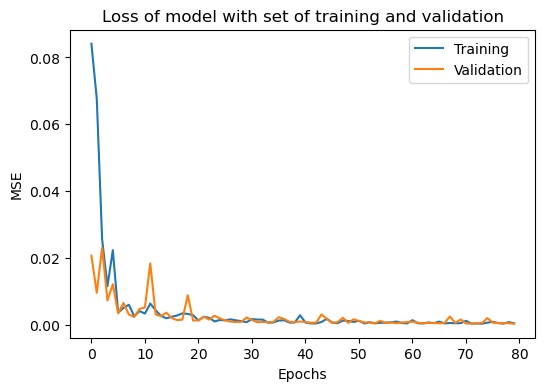

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(6,4))
plt.plot(history.history["loss"]);
plt.plot(history.history["val_loss"])
plt.title("Loss of model with set of training and validation")
plt.xlabel("Epochs");
plt.ylabel("MSE");
plt.legend(["Training","Validation"],loc="upper right");

In [65]:
#Proving the results

for i in range(0,20):
    print("Real = {} , Prediction = {} ".format(y_test.values[i][0] , round(y_pred.values[i][0])) )

Real = 198000 , Prediction = 196944 
Real = 380000 , Prediction = 380000 
Real = 479000 , Prediction = 479250 
Real = 165000 , Prediction = 164500 
Real = 1520000 , Prediction = 1516132 
Real = 116000 , Prediction = 115925 
Real = 730000 , Prediction = 730778 
Real = 1150000 , Prediction = 1177500 
Real = 610000 , Prediction = 610000 
Real = 334312 , Prediction = 334206 
Real = 300000 , Prediction = 300000 
Real = 2980000 , Prediction = 3007389 
Real = 160000 , Prediction = 159950 
Real = 660000 , Prediction = 690444 
Real = 995000 , Prediction = 996667 
Real = 100000 , Prediction = 99956 
Real = 860000 , Prediction = 860000 
Real = 1050000 , Prediction = 1013833 
Real = 990000 , Prediction = 985556 
Real = 109000 , Prediction = 108796 
